In [18]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 11,9


import numpy as np


import numpy as np

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nifty_200  = pd.read_csv('NIFTY_200.csv', header=0)
nifty_200.rename(columns={'Turnover (₹ Cr)':'Turnover','Date ':'Date'}, inplace=True)

In [3]:
nifty_200.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover
0,07-DEC-2022,9853.70,9869.05,9795.10,9811.40,1.033586e+09,33464.51
1,08-DEC-2022,9822.25,9846.10,9807.30,9840.85,1.097239e+09,34730.50
2,09-DEC-2022,9873.20,9874.55,9730.40,9783.65,2.541901e+09,43249.51
3,12-DEC-2022,9746.50,9796.65,9704.15,9789.60,1.751936e+09,33416.75
4,13-DEC-2022,9808.80,9844.00,9788.95,9837.90,2.180504e+09,35750.99


In [4]:
nifty_200['Date'] = pd.to_datetime(nifty_200['Date'])

/tmp/ipykernel_26959/731835211.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nifty_200['Date'] = pd.to_datetime(nifty_200['Date'])


In [5]:
prophet_df = pd.DataFrame(columns=['ds','y'])
prophet_df[['ds','y']] = nifty_200[['Date','Close ']]

In [6]:
prophet_df.dropna(inplace=True)
prophet_df.head()

,ds,y
0,2022-12-07,9811.40
1,2022-12-08,9840.85
2,2022-12-09,9783.65
3,2022-12-12,9789.60
4,2022-12-13,9837.90


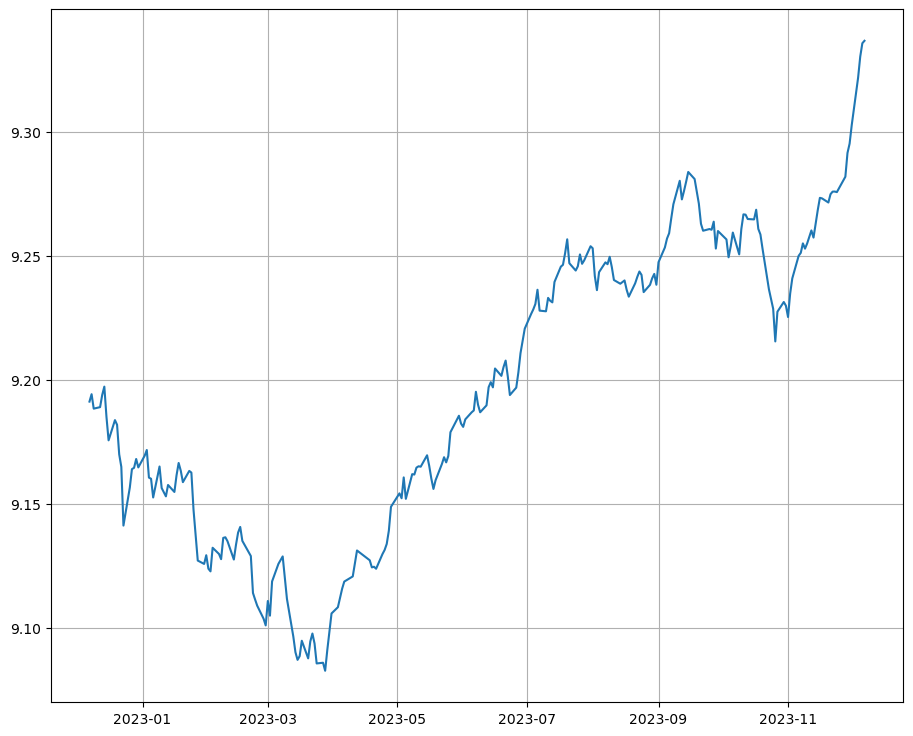

In [7]:
plt.plot(prophet_df['ds'],np.log(prophet_df['y']))
plt.grid('on')

In [8]:
np.argmin(prophet_df['y'])


77

In [9]:
np.min(prophet_df['y'])

8802.05

In [10]:
#prophet_df = prophet_df[prophet_df['y']>np.min(prophet_df['y'])]

In [11]:
# There is a massive low turnover on one of the days in first/second week of november
# Mainly because that day was diwali and it was a Muhurat trading window opened for half an hour

<Axes: >

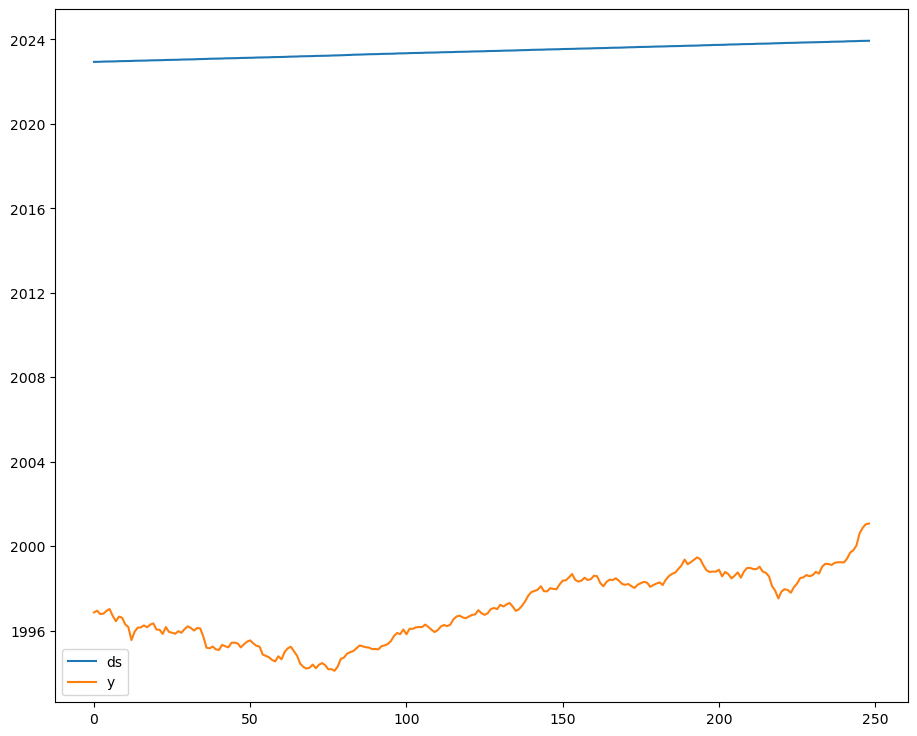

In [12]:
prophet_df.plot()

In [13]:
# Create a prophet instance

m = Prophet(
    interval_width=0.95,
    
)

In [14]:
m.fit(prophet_df)

21:18:43 - cmdstanpy - INFO - Chain [1] start processing
21:18:43 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# make future dates upto 1 year

future = m.make_future_dataframe(periods=90)
future.tail()

,ds
333,2024-03-02
334,2024-03-03
335,2024-03-04
336,2024-03-05
337,2024-03-06


In [16]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
333,2024-03-02,11104.348245,10590.310100,11637.304499
334,2024-03-03,10975.189339,10446.057243,11473.987002
335,2024-03-04,11107.820670,10592.912670,11626.912041
336,2024-03-05,11128.860869,10590.136039,11679.614233
337,2024-03-06,11131.771868,10545.104107,11657.802326


/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


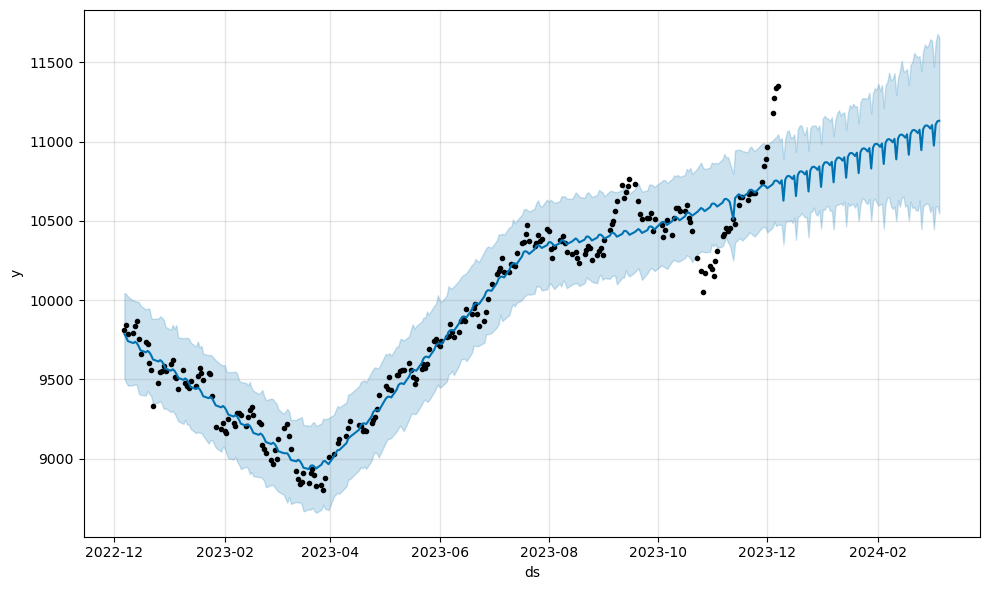

In [17]:
fig1 = m.plot(forecast)

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


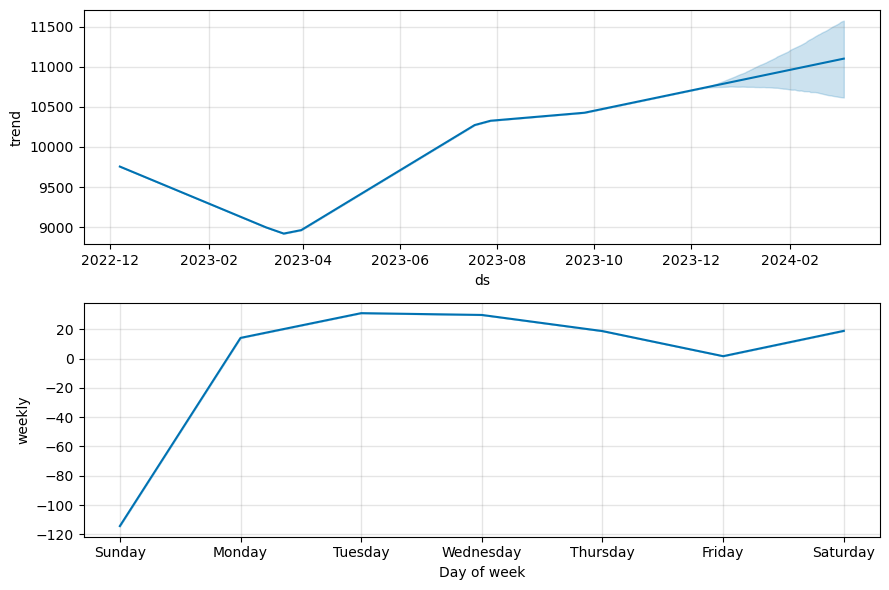

In [18]:
fig2 = m.plot_components(forecast)

In [19]:
import nbformat
nbformat.__version__

'5.9.2'

In [20]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [1]:
import pandas as pd
data2022 = pd.read_csv('NewDelhi_PM2.5_2022_YTD.csv')
data2023 = pd.read_csv('NewDelhi_PM2.5_2023_YTD.csv')

In [2]:
data2022.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2022-01-01 02:00 AM,2022,1,1,2,262.5,313,Hazardous,269.0,UG/M3,1 Hr,Valid
1,New Delhi,PM2.5 - Principal,2022-01-01 03:00 AM,2022,1,1,3,255.3,306,Hazardous,248.0,UG/M3,1 Hr,Valid
2,New Delhi,PM2.5 - Principal,2022-01-01 04:00 AM,2022,1,1,4,252.1,303,Hazardous,249.0,UG/M3,1 Hr,Valid
3,New Delhi,PM2.5 - Principal,2022-01-01 05:00 AM,2022,1,1,5,231.3,281,Very Unhealthy,205.0,UG/M3,1 Hr,Valid
4,New Delhi,PM2.5 - Principal,2022-01-01 06:00 AM,2022,1,1,6,222.6,272,Very Unhealthy,195.0,UG/M3,1 Hr,Valid


In [3]:
data2022.rename(columns={'Date (LT)':'Date'},inplace=True)
data2023.rename(columns={'Date (LT)':'Date'},inplace=True)

In [4]:
data2022[['Date','AQI']],data2023[['Date','AQI']]

(                     Date  AQI
 0     2022-01-01 02:00 AM  313
 1     2022-01-01 03:00 AM  306
 2     2022-01-01 04:00 AM  303
 3     2022-01-01 05:00 AM  281
 4     2022-01-01 06:00 AM  272
 ...                   ...  ...
 8146  2022-12-31 09:00 PM  206
 8147  2022-12-31 10:00 PM  214
 8148  2022-12-31 11:00 PM  223
 8149  2023-01-01 12:00 AM  237
 8150  2023-01-01 01:00 AM  244
 
 [8151 rows x 2 columns],
                      Date  AQI
 0     2023-01-01 02:00 AM  245
 1     2023-01-01 03:00 AM  238
 2     2023-01-01 04:00 AM  227
 3     2023-01-01 05:00 AM  201
 4     2023-01-01 06:00 AM  185
 ...                   ...  ...
 7291  2023-10-31 09:00 PM  252
 7292  2023-10-31 10:00 PM  251
 7293  2023-10-31 11:00 PM  249
 7294  2023-11-01 12:00 AM  251
 7295  2023-11-01 01:00 AM  257
 
 [7296 rows x 2 columns])

In [5]:
from datetime import datetime

In [6]:
data2023_till_sept = data2023[pd.to_datetime(data2023['Date']).dt.month<10]
test_data = data2023[pd.to_datetime(data2023['Date']).dt.month>=10]

In [7]:
test_data.shape

(746, 14)

In [8]:
# Lets join the data

train_data = pd.concat([data2022, data2023_till_sept], axis=0)

In [9]:
train_data.reset_index()

,index,Site,Parameter,Date,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,0,New Delhi,PM2.5 - Principal,2022-01-01 02:00 AM,2022,1,1,2,262.5,313,Hazardous,269.0,UG/M3,1 Hr,Valid
1,1,New Delhi,PM2.5 - Principal,2022-01-01 03:00 AM,2022,1,1,3,255.3,306,Hazardous,248.0,UG/M3,1 Hr,Valid
2,2,New Delhi,PM2.5 - Principal,2022-01-01 04:00 AM,2022,1,1,4,252.1,303,Hazardous,249.0,UG/M3,1 Hr,Valid
3,3,New Delhi,PM2.5 - Principal,2022-01-01 05:00 AM,2022,1,1,5,231.3,281,Very Unhealthy,205.0,UG/M3,1 Hr,Valid
4,4,New Delhi,PM2.5 - Principal,2022-01-01 06:00 AM,2022,1,1,6,222.6,272,Very Unhealthy,195.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14696,6545,New Delhi,PM2.5 - Principal,2023-09-30 07:00 PM,2023,9,30,19,42.0,117,Unhealthy for Sensitive Groups,44.0,UG/M3,1 Hr,Valid
14697,6546,New Delhi,PM2.5 - Principal,2023-09-30 08:00 PM,2023,9,30,20,46.0,127,Unhealthy for Sensitive Groups,50.0,UG/M3,1 Hr,Valid
14698,6547,New Delhi,PM2.5 - Principal,2023-09-30 09:00 PM,2023,9,30,21,49.0,134,Unhealthy for Sensitive Groups,52.0,UG/M3,1 Hr,Valid
14699,6548,New Delhi,PM2.5 - Principal,2023-09-30 10:00 PM,2023,9,30,22,51.0,139,Unhealthy for Sensitive Groups,53.0,UG/M3,1 Hr,Valid


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14701 entries, 0 to 6549
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           14701 non-null  object 
 1   Parameter      14701 non-null  object 
 2   Date           14701 non-null  object 
 3   Year           14701 non-null  int64  
 4   Month          14701 non-null  int64  
 5   Day            14701 non-null  int64  
 6   Hour           14701 non-null  int64  
 7   NowCast Conc.  14701 non-null  float64
 8   AQI            14701 non-null  int64  
 9   AQI Category   14662 non-null  object 
 10  Raw Conc.      14701 non-null  float64
 11  Conc. Unit     14701 non-null  object 
 12  Duration       14701 non-null  object 
 13  QC Name        14701 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.7+ MB


In [11]:
train_data.isna().sum()

Site              0
Parameter         0
Date              0
Year              0
Month             0
Day               0
Hour              0
NowCast Conc.     0
AQI               0
AQI Category     39
Raw Conc.         0
Conc. Unit        0
Duration          0
QC Name           0
dtype: int64

In [12]:
train_data_1 = pd.DataFrame(columns=['ds','y'])

In [13]:
train_data_1.describe()

,ds,y
count,0,0
unique,0,0
top,NaN,NaN
freq,NaN,NaN


In [14]:
train_data_1[['ds','y']] = train_data[['Date','AQI']]

In [15]:
train_data_1['ds'] = pd.to_datetime(train_data_1['ds'])

In [16]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14701 entries, 0 to 6549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      14701 non-null  datetime64[ns]
 1   y       14701 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 344.6 KB


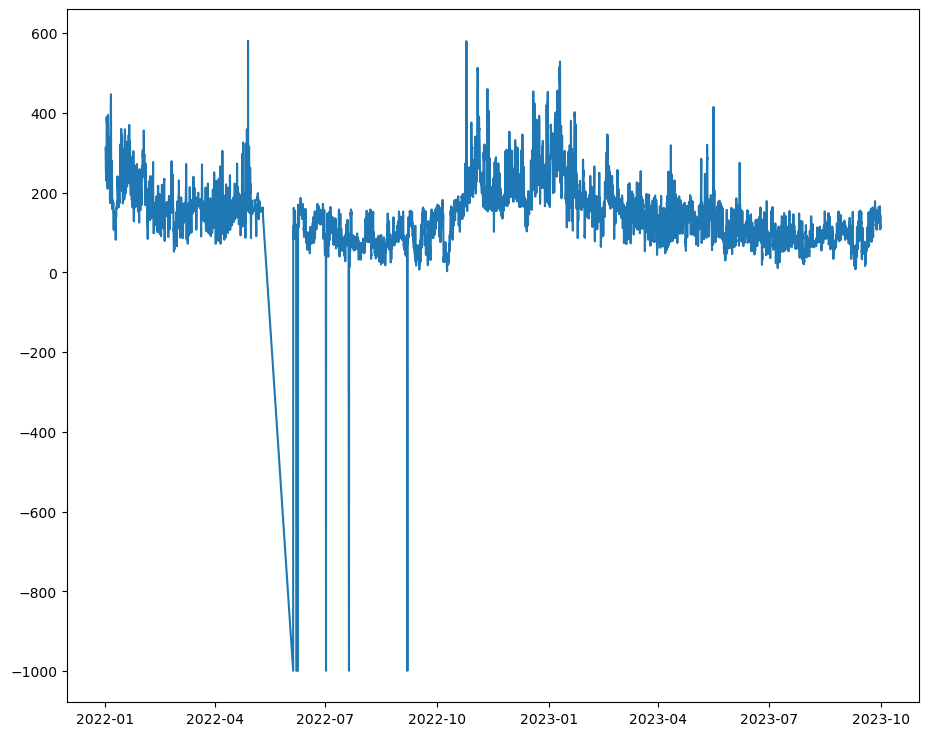

In [19]:
plt.plot(train_data_1['ds'],train_data_1['y'])
# Clearly there is many values which are below zero

# We should know what the AQI cannot be lower than 0

# Hence we should adopt  a step to assign all those values as np.nan


# then replace those nan values with something

In [20]:
train_data_1.loc[train_data_1['y']<0, 'y'] = np.nan
train_data_1.isna().sum()

ds     0
y     39
dtype: int64

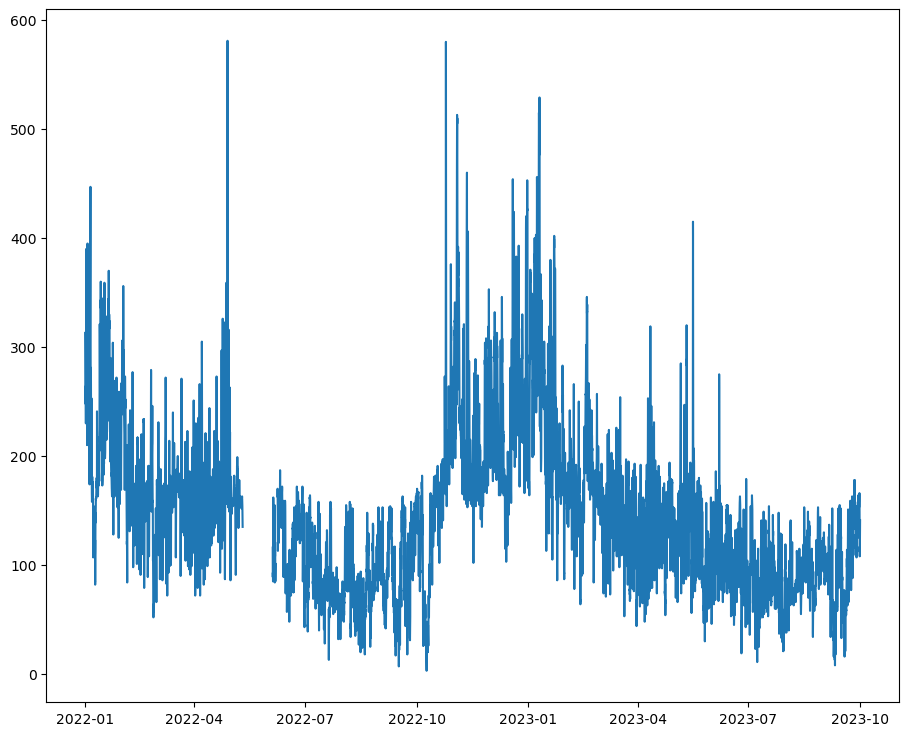

In [21]:
plt.plot(train_data_1['ds'], train_data_1['y'])

#clearly those nan values are not plotted

In [22]:
train_data_1.describe()

# Well the standard deviation is 

,ds,y
count,14701,14662.000000
mean,2022-11-23 06:33:29.251071232,148.011526
min,2022-01-01 02:00:00,3.000000
25%,2022-06-27 21:00:00,92.000000
50%,2022-11-28 17:00:00,149.000000
75%,2023-04-30 20:00:00,179.000000
max,2023-09-30 23:00:00,581.000000
std,NaN,72.517896


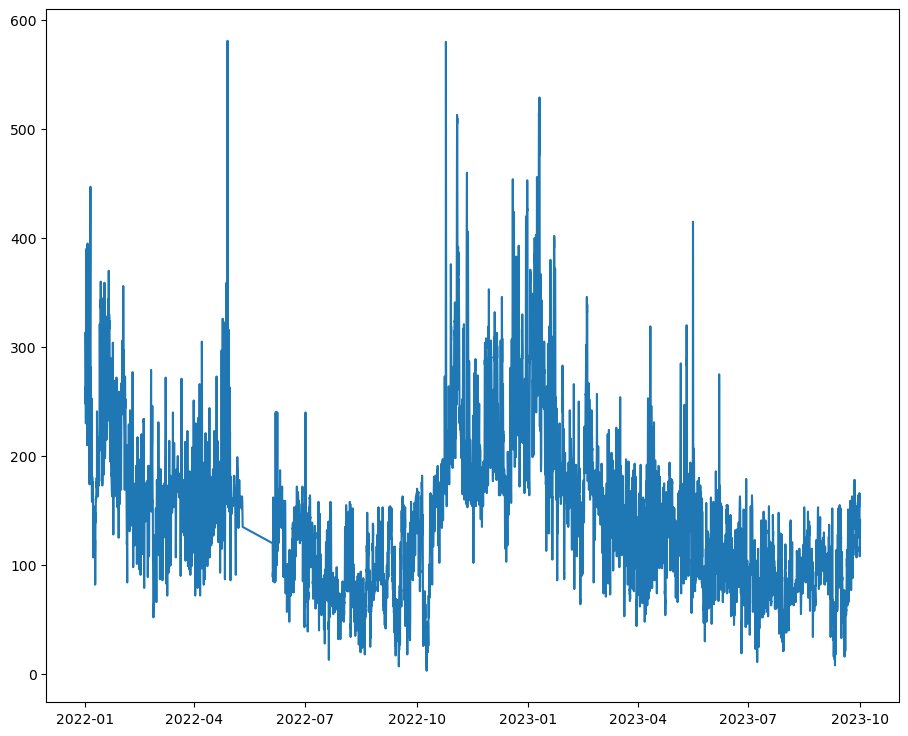

In [23]:
AQI = []
std = np.std(train_data_1['y'])
vals = np.arange(100.0,250.0,20).tolist()

for i in train_data_1['y'].values:
    if np.isnan(i):
        
        AQI.append(np.random.choice(vals))
    else:
        AQI.append(i)
train_data_1['y'] = AQI
plt.plot(train_data_1['ds'],AQI)

In [24]:
# Now create a prophet instance
# But before that lets try to decompose the data using regular statsmodels algo

import statsmodels.api as sm

dcmp = sm.tsa.seasonal_decompose(train_data_1.set_index('ds'),period=60,model='multplicative')

In [25]:
rcParams['figure.figsize'] = 20,8

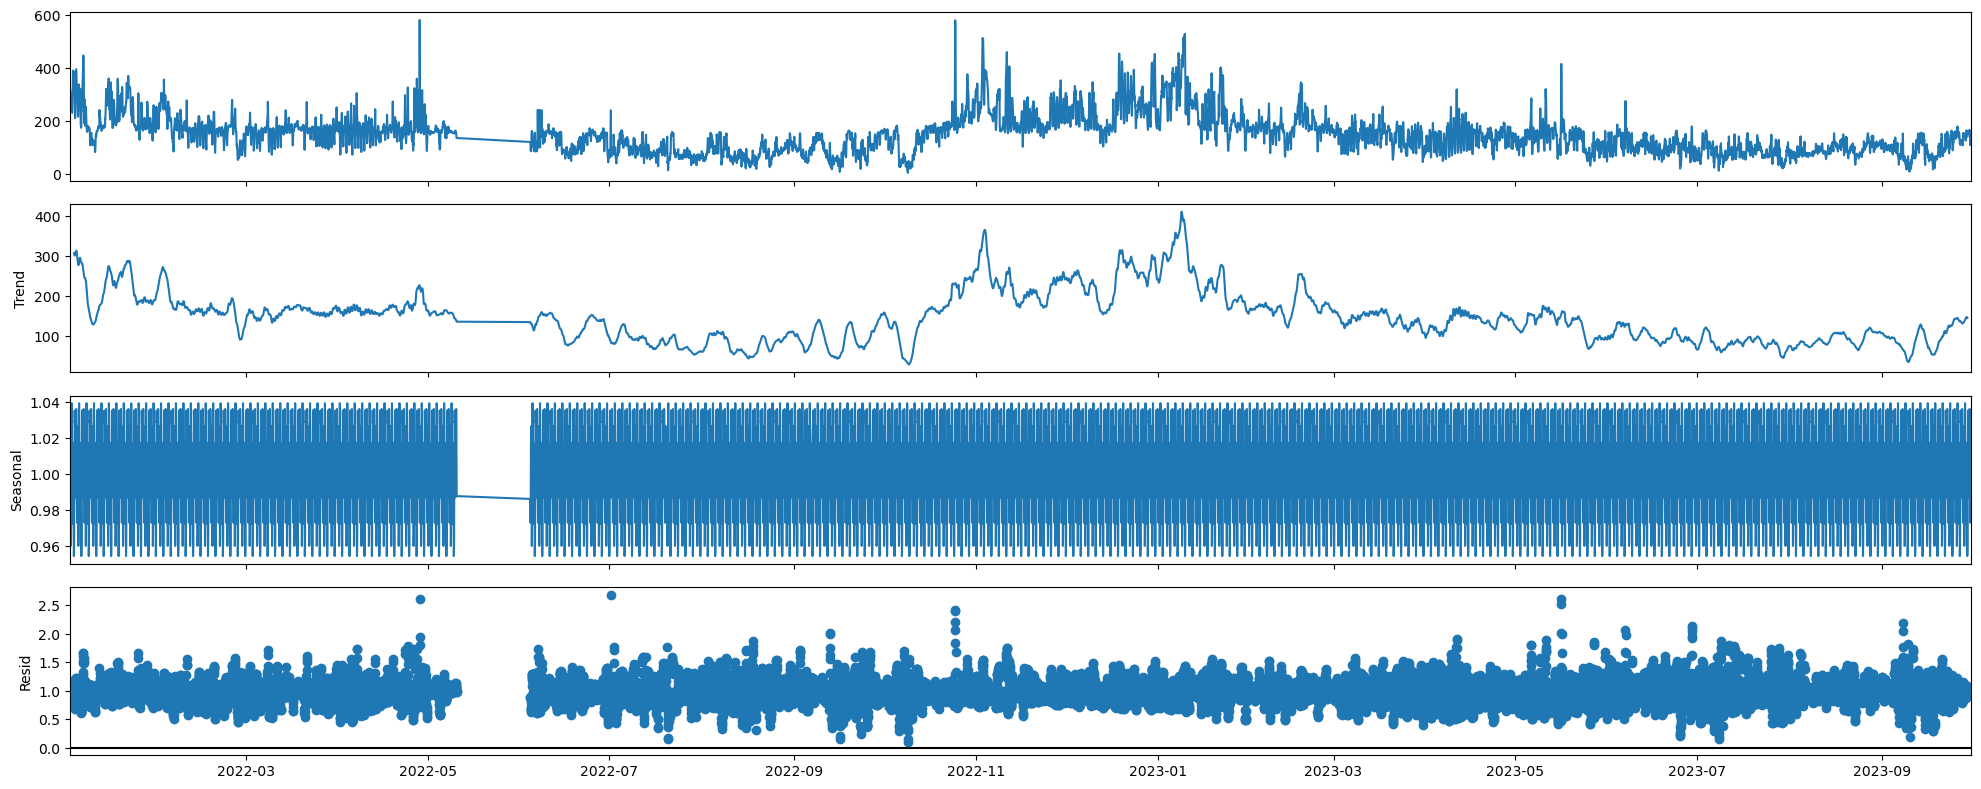

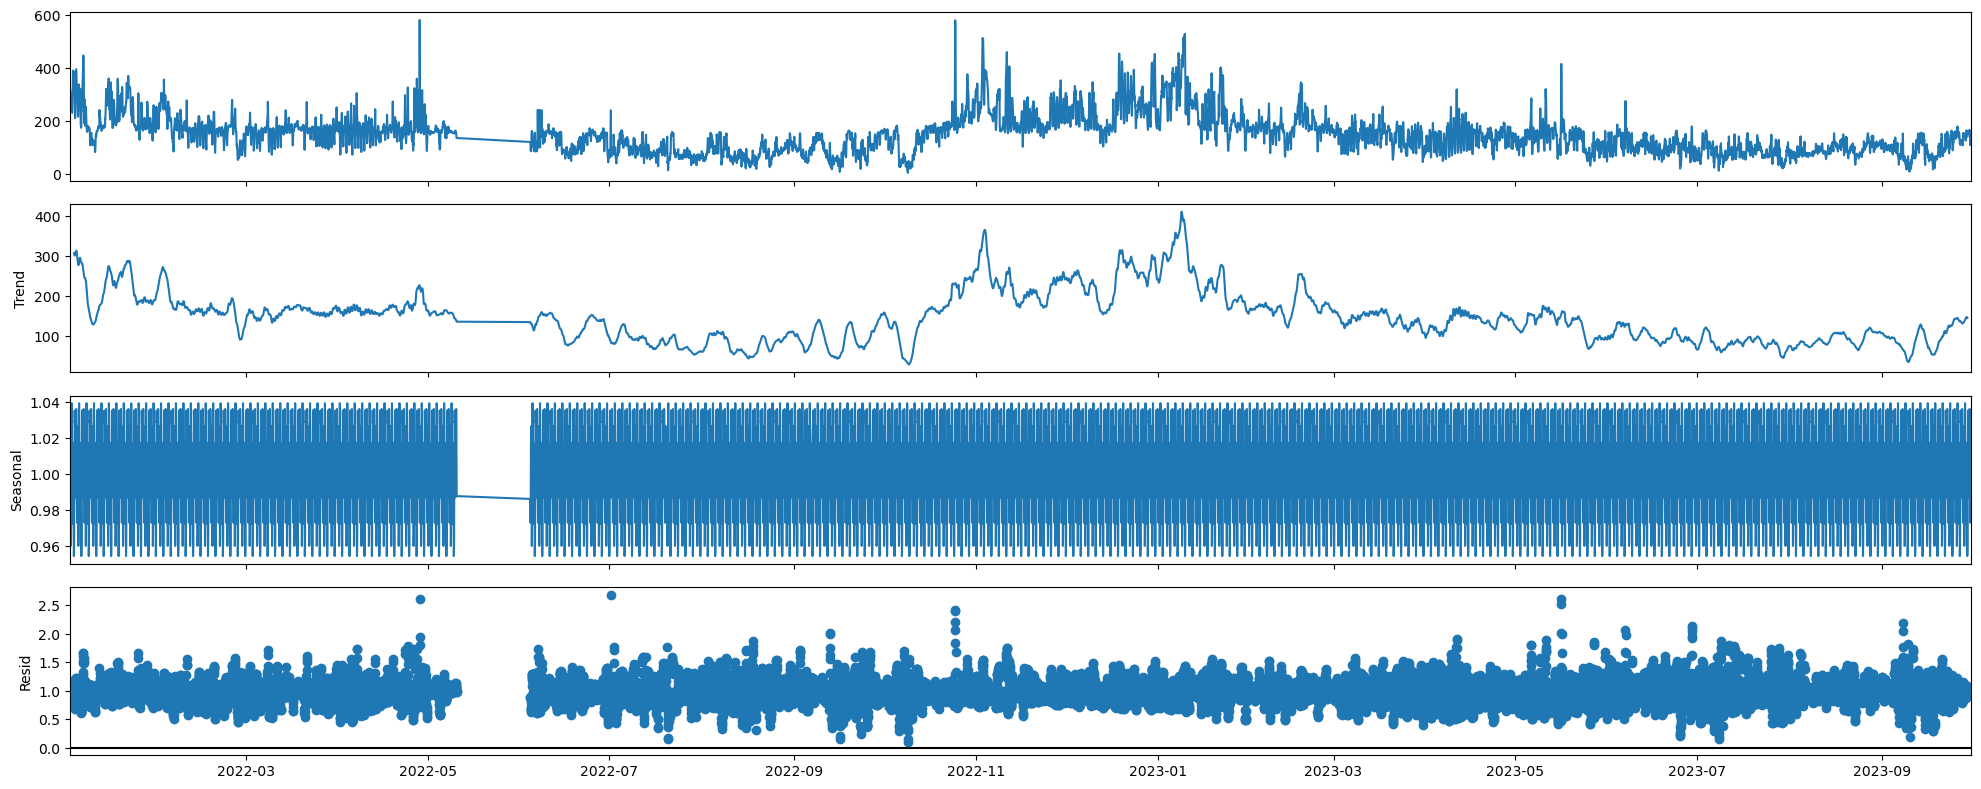

In [26]:
dcmp.plot()

In [27]:
# Now lest build a prophet model

model = Prophet()
model.fit(train_data_1)

21:29:39 - cmdstanpy - INFO - Chain [1] start processing
21:29:49 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
future = m.make_future_dataframe(periods=40)
future.tail()

NameError: name 'm' is not defined

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
283,2024-01-12,100.199731,-144.942766,328.152535
284,2024-01-13,99.225615,-150.119988,338.641985
285,2024-01-14,93.647424,-162.662179,336.164820
286,2024-01-15,93.974816,-180.669503,332.575487
287,2024-01-16,103.596735,-166.455650,345.392064


/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



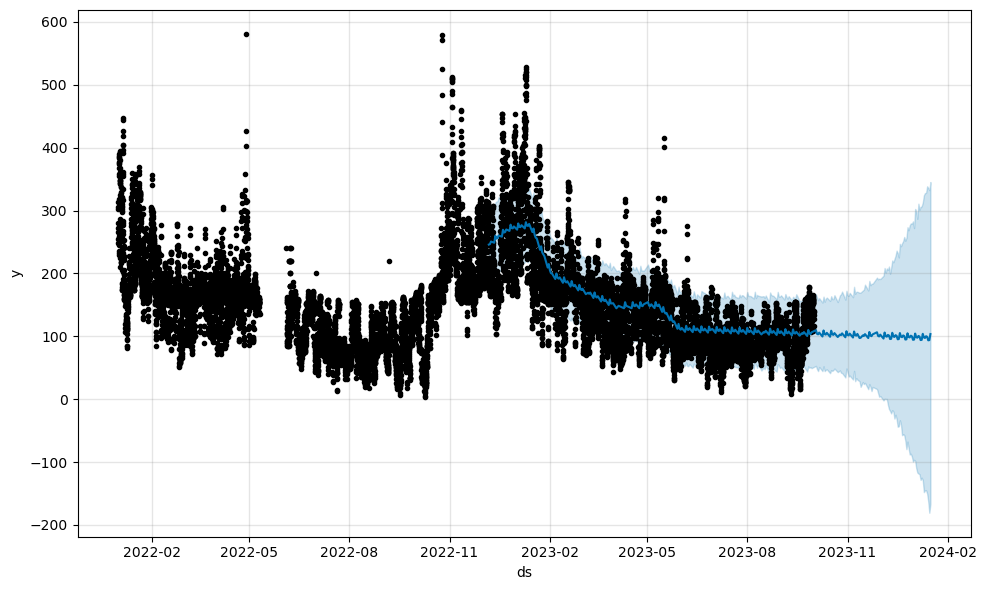

In [ ]:
fig1 = model.plot(forecast)

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



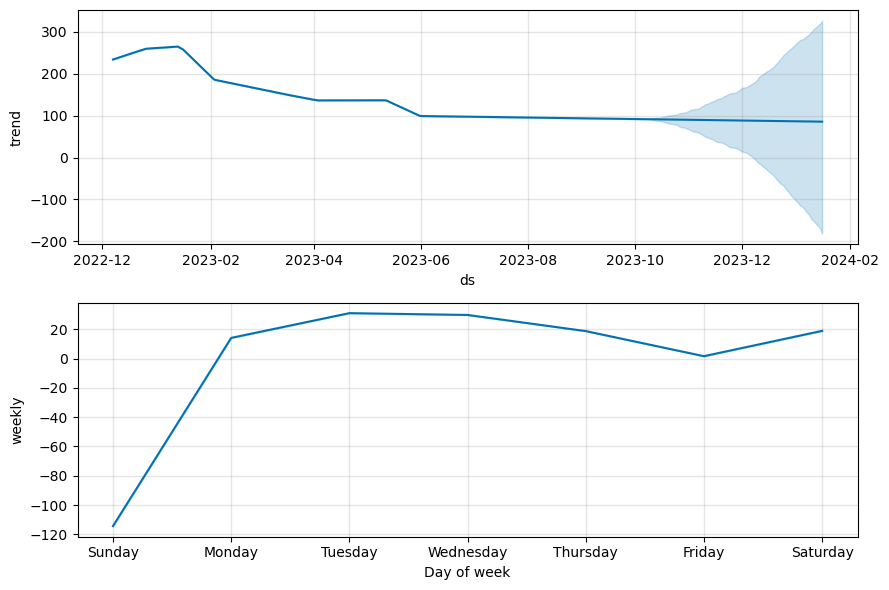

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
test_data_1 = test_data[['Date', 'AQI']]

In [ ]:
test_data_1 = test_data_1.rename(columns={'Date':'ds','AQI':'y'}).set_index('ds')

In [ ]:
test_data_1.head()

,y
ds,
2023-10-01 12:00 AM,145
2023-10-01 01:00 AM,143
2023-10-01 02:00 AM,144
2023-10-01 03:00 AM,139
2023-10-01 04:00 AM,139


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

(0.0, 600.0)

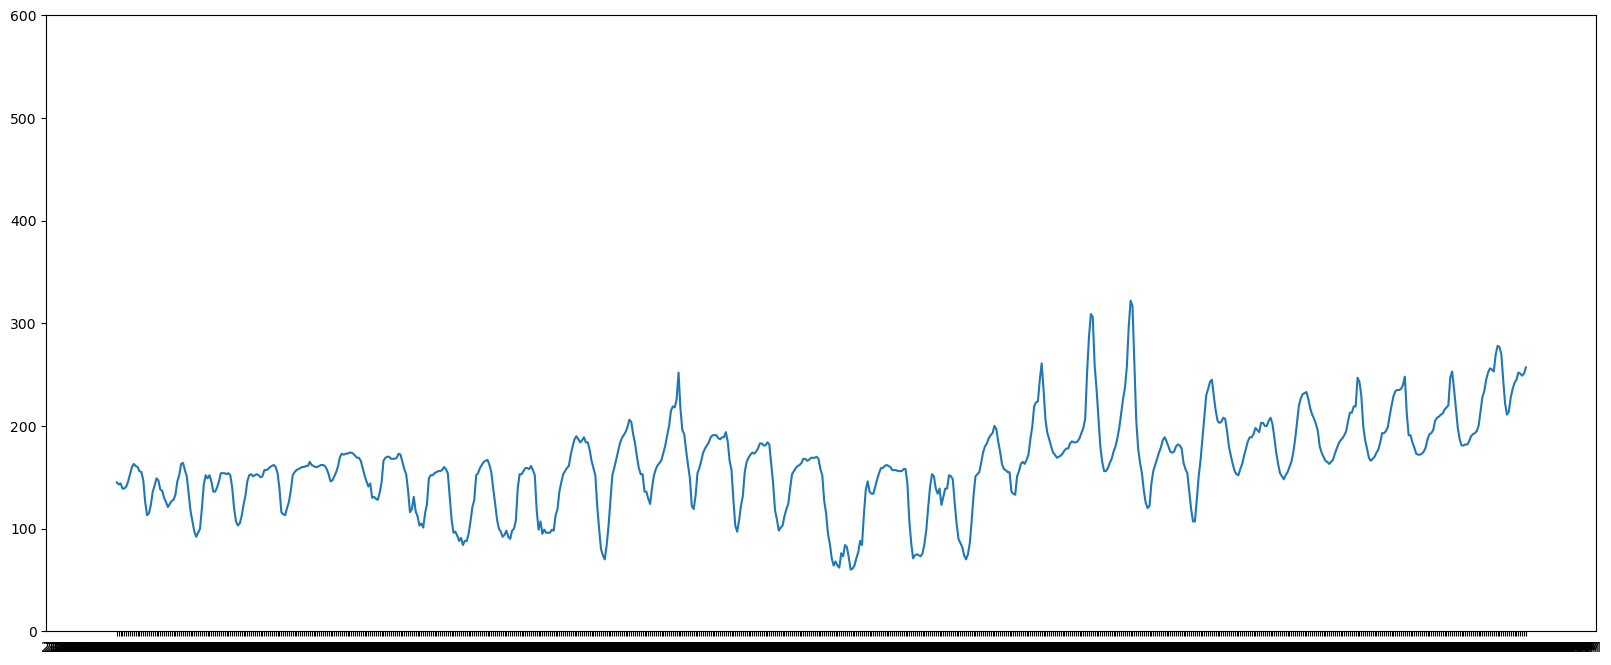

In [ ]:
plt.plot(test_data_1)
plt.ylim(0,600)


Forecasting Growth

In [ ]:
train_data_1['cap'] = 600  # This is the saturating maximum

In [ ]:
m = Prophet(growth='logistic')
m.fit(train_data_1)

21:41:41 - cmdstanpy - INFO - Chain [1] start processing
21:41:49 - cmdstanpy - INFO - Chain [1] done processing


/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



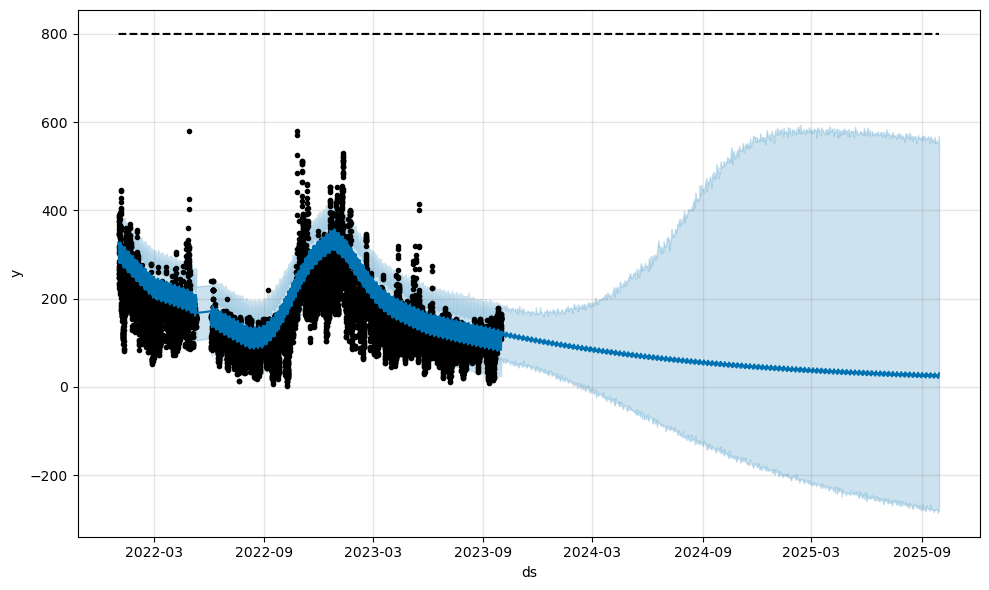

In [ ]:
future  = m.make_future_dataframe(periods=365*2)
future['cap'] =  800  # Max value to cap at

fcst =  m.predict(future)
fig = m.plot(fcst)

In [ ]:
# The value can also be capped at saturating minimum


train_data_1['floor'] = 0
future['floor'] = 0
m = Prophet(growth="logistic")
m.fit(train_data_1)

21:44:39 - cmdstanpy - INFO - Chain [1] start processing
21:44:46 - cmdstanpy - INFO - Chain [1] done processing


/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



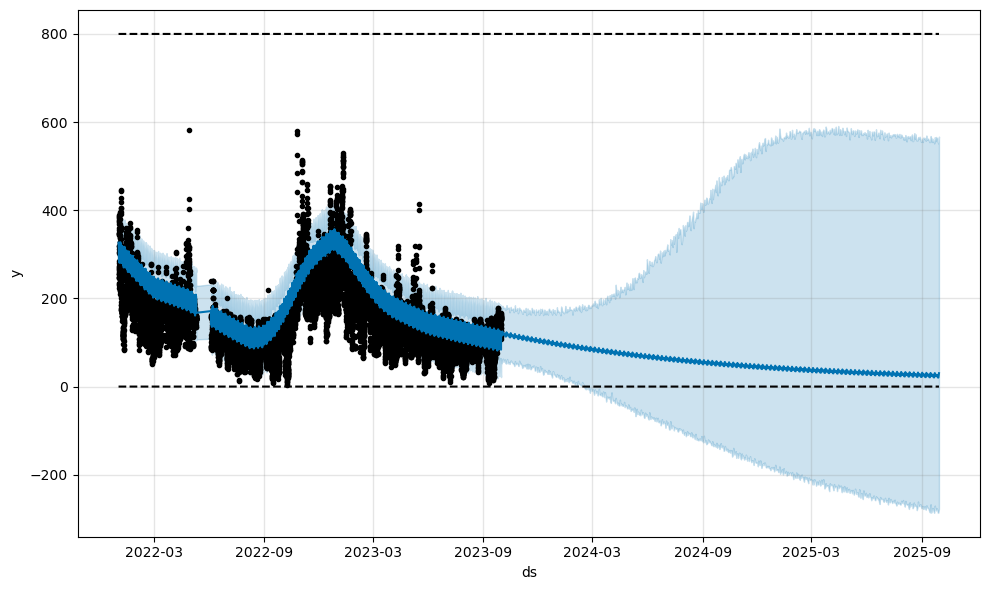

In [ ]:
fcst = m.predict(future)
fig = m.plot(fcst)

Trend Checkpoints

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



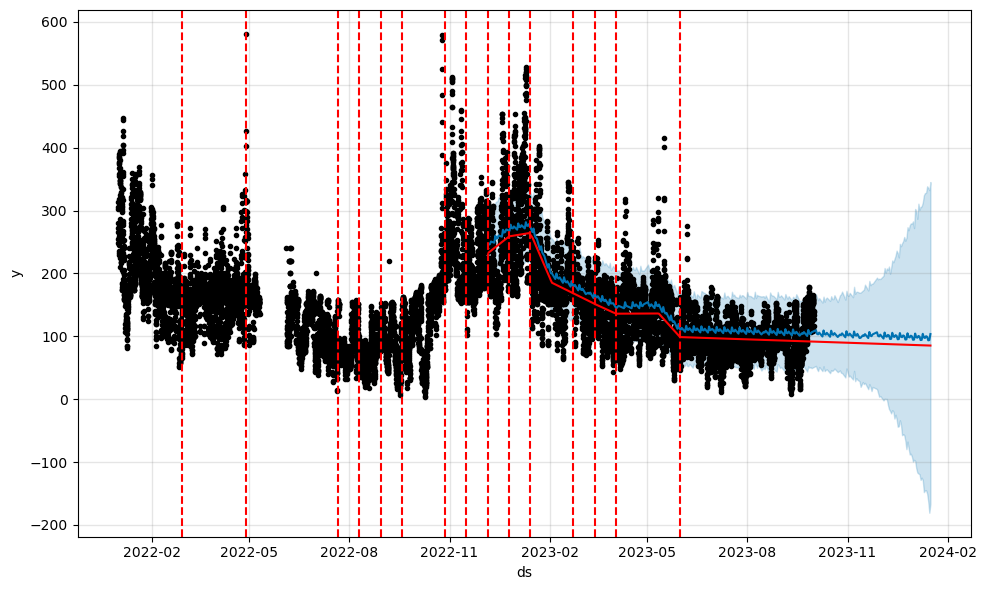

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)


# Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitures of the rate changes - essentially means that prophet has a large number of possible places where the reate can change, but will use as few of them as possible.

In [ ]:
#you can adjust the changepoint range by specifying m=Prophet(changepoint_range=0.9)


# Adjusting trend flexibility


m = Prophet(changepoint_prior_scale=0.5, growth='logistic', changepoint_range=0.9)

# more the changepoint prior scale more the flexibility

23:50:03 - cmdstanpy - INFO - Chain [1] start processing
23:50:17 - cmdstanpy - INFO - Chain [1] done processing
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



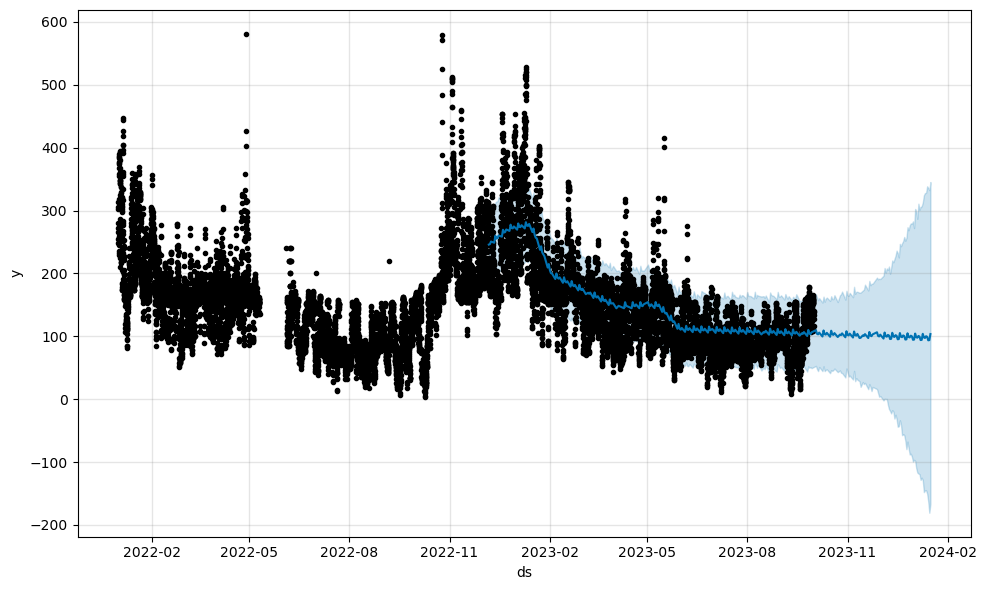

In [ ]:
m.fit(train_data_1).predict(future)
fig = m.plot(forecast)

23:55:32 - cmdstanpy - INFO - Chain [1] start processing
23:55:33 - cmdstanpy - INFO - Chain [1] done processing
23:55:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
23:55:34 - cmdstanpy - INFO - Chain [1] start processing
23:55:41 - cmdstanpy - INFO - Chain [1] done processing
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

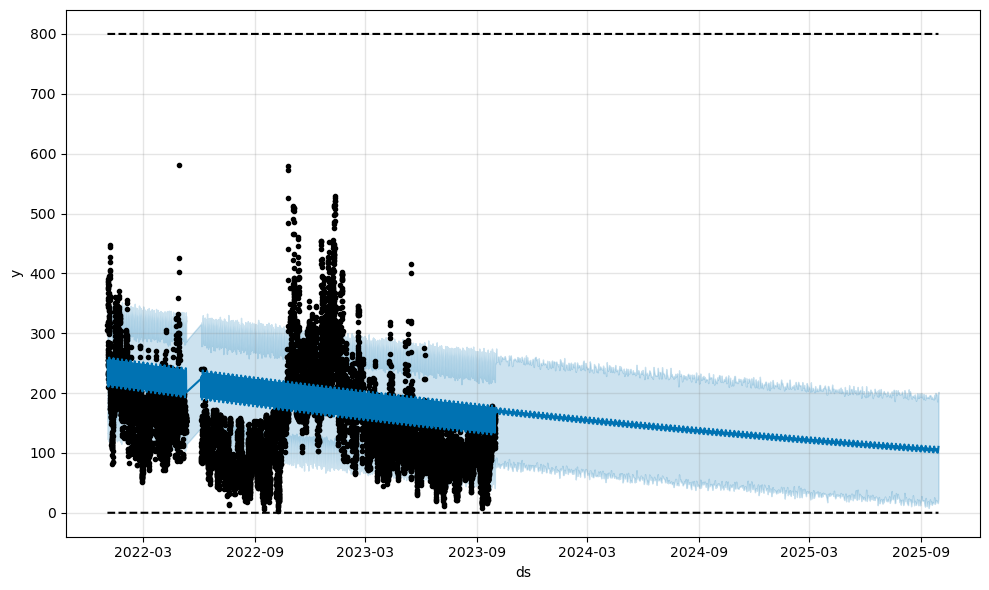

In [ ]:
# Specifying the locations of the chagnepoints/Manual changepoint implementation

m = Prophet(growth='logistic',changepoints=['01-11-2022'])
forecast = m.fit(train_data_1).predict(future)
fig = m.plot(forecast)

Holidays for subdivisions(Python)

In [35]:
from prophet.make_holidays import make_holidays_df

national_holidays_ind = make_holidays_df(year_list=[2018 + i for i in range(10)],country="IND")

In [39]:
national_holidays_ind.head(10)

,ds,holiday
0,2018-01-14,Makar Sankranti / Pongal
1,2018-01-26,Republic Day
2,2018-08-15,Independence Day
3,2018-10-02,Gandhi Jayanti
4,2018-05-01,Labour Day
5,2018-11-07,Diwali
6,2018-03-02,Holi
7,2018-09-20,Day of Ashura* (*estimated)
8,2018-11-20,Mawlid* (*estimated)
9,2018-06-15,Eid ul-Fitr* (*estimated)


In [47]:
train_data_1['floor'] = 0
train_data_1['cap'] = 500

model = Prophet(growth='logistic',changepoint_range=0.9, holidays=national_holidays_ind,)

In [48]:
model.fit(train_data_1)

21:42:34 - cmdstanpy - INFO - Chain [1] start processing
21:42:46 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
model.train_holiday_names

0        Makar Sankranti / Pongal
1                    Republic Day
2                Independence Day
3                  Gandhi Jayanti
4                      Labour Day
5                          Diwali
6                            Holi
7     Day of Ashura* (*estimated)
8            Mawlid* (*estimated)
9       Eid ul-Fitr* (*estimated)
10      Eid al-Adha* (*estimated)
11                    Palm Sunday
12                    Good Friday
13                  Easter Sunday
14             Feast of Pentecost
15                  Christmas Day
dtype: object

/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old beha

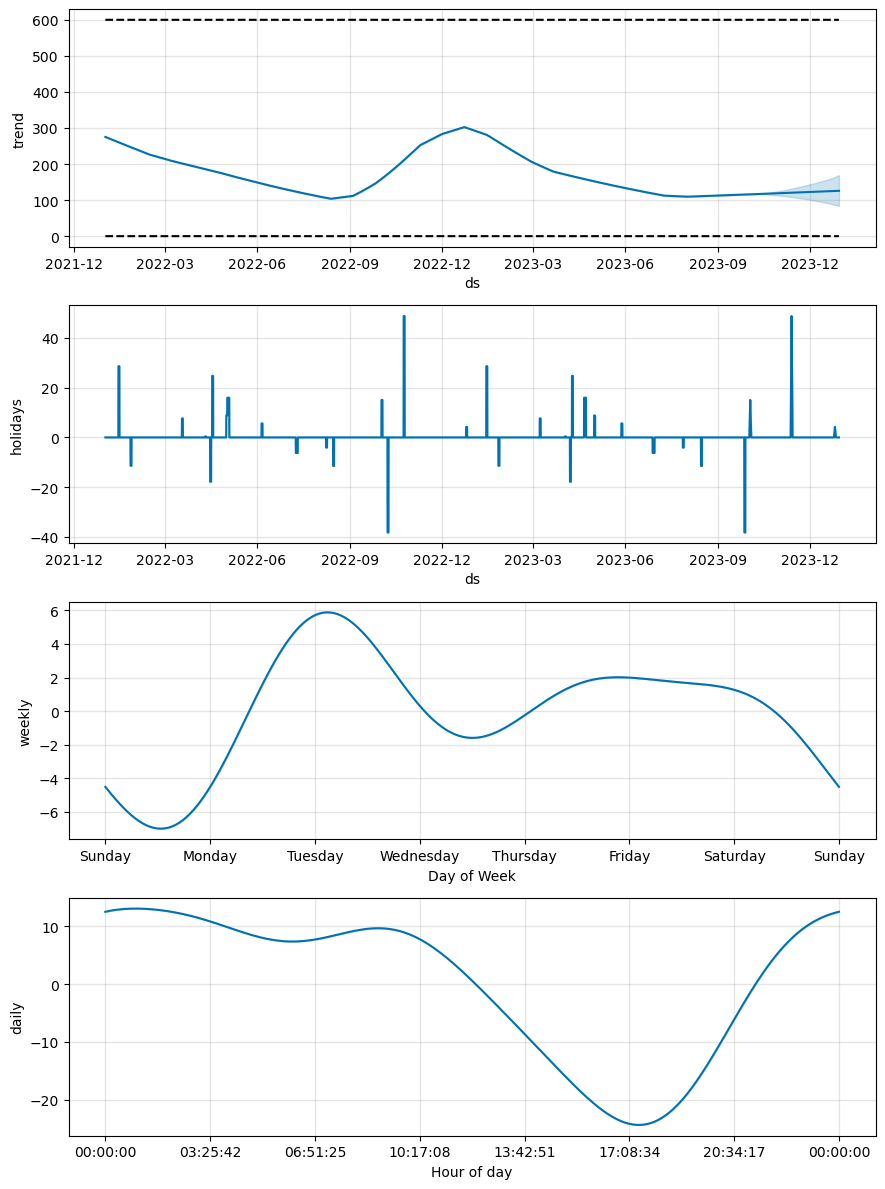

In [55]:
# Forecast
future = model.make_future_dataframe(periods=90)
future['cap'] = 600
future['floor'] = 0
forecast = model.predict(future)
fig = model.plot_components(forecast)

Fourier Order for Seasonalities

In [64]:
# Seasonalities are estimated using a partial fourier sum.

from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(train_data_1)


# The number denotest Fourier terms. this allows the seasonality to fit faster changing cycles, but can also lead to overfitting: N fourier trems corresponds to 2N variables used for modelling the cycle


23:31:15 - cmdstanpy - INFO - Chain [1] start processing
23:31:21 - cmdstanpy - INFO - Chain [1] done processing


/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


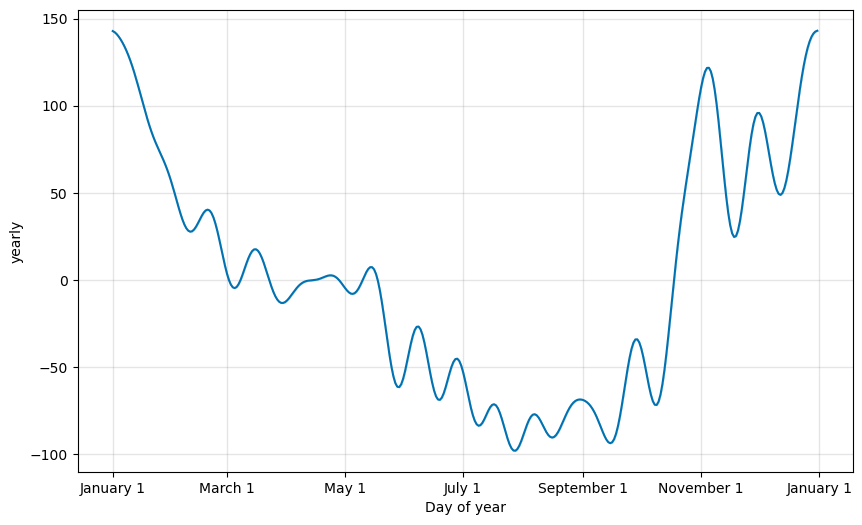

In [65]:
plot_yearly(m)

23:39:56 - cmdstanpy - INFO - Chain [1] start processing
23:39:59 - cmdstanpy - INFO - Chain [1] done processing
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/susearc/Macos/py3.11/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is 

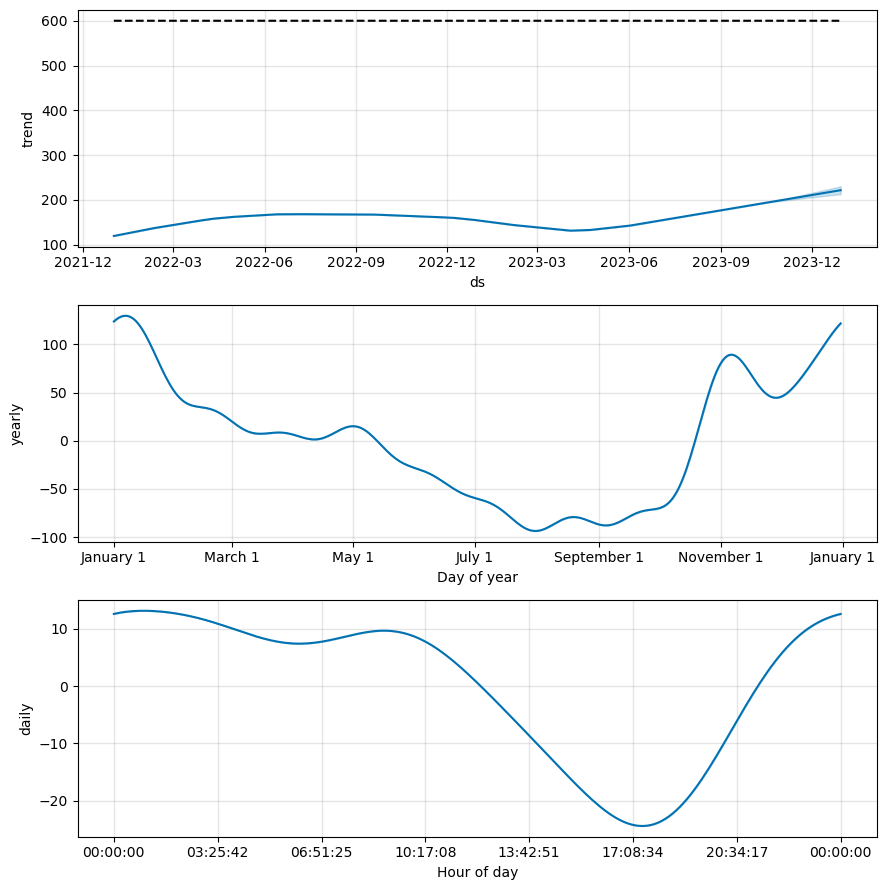

In [71]:
# Manipulating the seasonality

m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='yearly', period=365, fourier_order=10)
forecast = m.fit(train_data_1).predict(future)
fig = m.plot_components(forecast)

In [76]:
# Assuming Rainy season starts from June and ends in September
# We define a function called is_rainy_season


def is_rainy_season(ds):
    date = pd.to_datetime(ds)
    return (date.month>6 or date.month<10)


train_data_1['on_season'] = train_data_1['ds'].apply(is_rainy_season)
train_data_1['off_season'] = ~train_data_1['ds'].apply(is_rainy_season)


In [81]:
train_data_1.head()

,ds,y,floor,cap,on_season,off_season
0,2022-01-01 02:00:00,313.0,0,500,True,False
1,2022-01-01 03:00:00,306.0,0,500,True,False
2,2022-01-01 04:00:00,303.0,0,500,True,False
3,2022-01-01 05:00:00,281.0,0,500,True,False
4,2022-01-01 06:00:00,272.0,0,500,True,False
